Importing the libraries.

In [2]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Data Collection

In [3]:
import datetime
now = datetime.datetime.now()
date = str(now).split(' ')[0]
time_str = f'{date} 05:30:00'
time = datetime.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
curr_time = round(time.timestamp())

In [4]:
periods = {
   '%5ENSEI':{
        'period1':1189987200,
        'period2':curr_time,
    },
   'RELIANCE.NS':{
      'period1':820454400,
      'period2':curr_time,
   }
}

Loading the dataset.

In [5]:
!pip install fake_useragent
import requests
from fake_useragent import UserAgent

def download_file(stock_name):
    global curr_time
    ua_str = UserAgent().chrome
    file_url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock_name}?period1={periods[stock_name]['period1']}&period2={curr_time}&interval=1d&events=history&includeAdjustedClose=true"
    r = requests.get(file_url, headers={'User-Agent':ua_str})

    with open (stock_name+'.csv', 'wb') as f:
        f.write(r.content)

In [6]:
stock_name = '%5ENSEI'
# stock_name = 'RELIANCE.NS'
download_file(stock_name)

In [7]:
df = pd.read_csv(stock_name+'.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4042,2024-01-30,21775.750000,21813.050781,21501.800781,21522.099609,21522.099609,375100.0
4043,2024-01-31,21487.250000,21741.349609,21448.849609,21725.699219,21725.699219,410600.0
4044,2024-02-01,21780.650391,21832.949219,21658.750000,21697.449219,21697.449219,332500.0
4045,2024-02-02,21812.750000,22126.800781,21805.550781,21853.800781,21853.800781,442800.0
4046,2024-02-05,21921.050781,21964.300781,21833.400391,21908.900391,21908.900391,0.0


In [8]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index = df['Date']
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2024-01-30,2024-01-30,21775.750000,21813.050781,21501.800781,21522.099609,21522.099609,375100.0
2024-01-31,2024-01-31,21487.250000,21741.349609,21448.849609,21725.699219,21725.699219,410600.0
2024-02-01,2024-02-01,21780.650391,21832.949219,21658.750000,21697.449219,21697.449219,332500.0
2024-02-02,2024-02-02,21812.750000,22126.800781,21805.550781,21853.800781,21853.800781,442800.0
2024-02-05,2024-02-05,21921.050781,21964.300781,21833.400391,21908.900391,21908.900391,0.0


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4.015000e+03
mean,9363.847049,9415.703972,9296.945533,9357.758995,9357.758995,1.992708e+05
std,4653.897737,4664.195052,4635.316919,4650.956060,4650.956060,2.109040e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5517.074951,5556.449951,5473.050049,5521.500000,5521.500000,0.000000e+00
50%,8243.200195,8285.599609,8190.799805,8238.150391,8238.150391,1.711000e+05
75%,11538.925293,11582.149903,11453.274902,11520.674805,11520.674805,2.751000e+05
max,22080.500000,22126.800781,21969.800781,22097.449219,22097.449219,1.811000e+06


In [10]:
dataset = pd.DataFrame(df[['Close']])
dataset.tail()

,Close
Date,
2024-01-30,21522.099609
2024-01-31,21725.699219
2024-02-01,21697.449219
2024-02-02,21853.800781
2024-02-05,21908.900391


Analyzing the field "close" of the dataset.

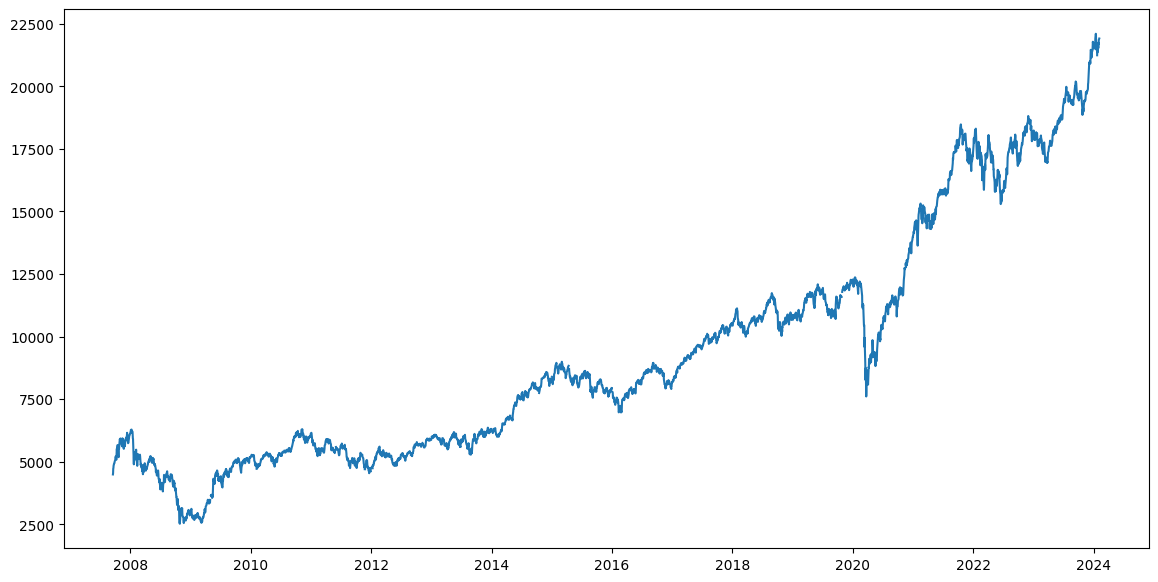

In [11]:
plt.figure(figsize=(14,7))
plt.plot(dataset,label='Close Price history')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4047 entries, 2007-09-17 to 2024-02-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4015 non-null   float64
dtypes: float64(1)
memory usage: 63.2 KB


Data Preprocessing

In [13]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4015 entries, 2007-09-17 to 2024-02-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4015 non-null   float64
dtypes: float64(1)
memory usage: 62.7 KB


In [14]:
dataset.tail()

,Close
Date,
2024-01-30,21522.099609
2024-01-31,21725.699219
2024-02-01,21697.449219
2024-02-02,21853.800781
2024-02-05,21908.900391


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data[:5]

array([[0.10067056],
       [0.10330427],
       [0.1128147 ],
       [0.11359125],
       [0.11818936]])

In [16]:
window_size = 10

x_data, y_data = [],[]

for i in range(window_size, len(scaled_data)):
    x_data.append(scaled_data[i-window_size:i,0])
    y_data.append(scaled_data[i,0])

x_data, y_data = np.array(x_data), np.array(y_data)

x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))
y_data = np.reshape(y_data, (y_data.shape[0], 1))

x_data.shape, y_data.shape

((4005, 10, 1), (4005, 1))

In [17]:
train_size = 0.8

x_train, x_test = x_data[:(int)(len(x_data)*train_size)], x_data[(int)(len(x_data)*train_size):]
y_train, y_test = y_data[:(int)(len(y_data)*train_size)], y_data[(int)(len(y_data)*train_size):]

y_original = dataset[window_size + len(y_train):]

x_train.shape, y_train.shape, x_test.shape, y_test.shape, y_original.shape

((3204, 10, 1), (3204, 1), (801, 10, 1), (801, 1), (801, 1))